# Unit 5 - Financial Planning

In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [6]:
# Fetch current BTC price
btc_response = requests.get(btc_url). json()
btc_price = btc_response['data']['1']['quotes']['USD']['price']
# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_price = eth_response ['data']['1027']['quotes']['USD']['price']
# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $27752.40
The current value of your 5.3 ETH is $8423.98


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [27]:
# Format current date as ISO format
today = pd.Timestamp('2020-05-01', tz='America/New_York').isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_investments = api.get_bars(
                    tickers,
                    timeframe,
                    start = today
).df

df_investments.head()



,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2020-05-01 04:00:00+00:00,116.97,117.0998,116.6775,116.87,6099551,24394,116.846121,AGG
2020-05-04 04:00:00+00:00,116.89,117.0900,116.8700,116.97,3684081,15545,116.960599,AGG
2020-05-05 04:00:00+00:00,116.96,116.9700,116.8100,116.88,4611519,15146,116.879640,AGG
2020-05-06 04:00:00+00:00,116.44,116.7100,116.3000,116.41,6394949,20233,116.426742,AGG
2020-05-07 04:00:00+00:00,116.61,116.7700,116.4200,116.77,3786651,15963,116.641826,AGG


In [28]:
# Reorganize the DataFrame
# Separate ticker data

AGG = df_investments[df_investments['symbol']=='AGG'].drop('symbol',axis=1)
SPY = df_investments[df_investments['symbol']=='SPY'].drop('symbol',axis=1)

# Concatenate the ticker DataFrames
df_investments = pd.concat([AGG, SPY],axis=1,keys=['AGG','SPY'])
# Preview DataFrame
df_investments.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2020-05-01 04:00:00+00:00  116.97  117.0998  116.6775  116.87  6099551   
2020-05-04 04:00:00+00:00  116.89  117.0900  116.8700  116.97  3684081   
2020-05-05 04:00:00+00:00  116.96  116.9700  116.8100  116.88  4611519   
2020-05-06 04:00:00+00:00  116.44  116.7100  116.3000  116.41  6394949   
2020-05-07 04:00:00+00:00  116.61  116.7700  116.4200  116.77  3786651   

                                                      SPY                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2020-05-01 04:00:00+00:00       24394  116.846121  285.31  290.6572  281.5200   
2020-05-04 04:00:00+00:00       15545  116.960599  280.73  283.9000  279.1300   
2020-05-05 04:00:00+00:00       15146  116.879640  286.64  289.2500  283.7134   
2020-05-06 04:00:00+00:00       20233  116.426742  288.05  288.4600  283.7800   
2020-05-07 04:00:00+00:00       15963  116.641826  287.75  289.7800  287.1300   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2020-05-01 04:00:00+00:00  282.83  125180028      639987  284.092832  
2020-05-04 04:00:00+00:00  283.59   80882213      460681  281.765334  
2020-05-05 04:00:00+00:00  286.15   79569939      459764  287.400201  
2020-05-06 04:00:00+00:00  284.34   73632628      436219  286.096273  
2020-05-07 04:00:00+00:00  287.70   75250412      422688  287.989956

In [29]:
# Pick AGG and SPY close prices
agg_close_price = float(df_investments['AGG']['close'][0])
spy_close_price = float(df_investments['SPY']['close'][0])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $116.87
Current SPY closing price: $282.83


In [30]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $14141.50
The current value of your 200 AGG shares is $23374.00


### Savings Health Analysis

In [38]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
savings_data = [
    my_btc_value + my_eth_value,
    my_spy_value + my_agg_value,
]

# Create savings DataFrame
df_savings = pd.DataFrame(savings_data, columns=['amount'], index=['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,36176.379
shares,37515.500


<AxesSubplot: title={'center': 'Composition of Personal Savings'}, ylabel='amount'>

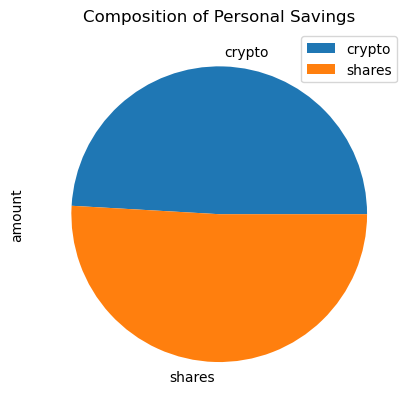

In [39]:
# Plot savings pie chart
df_savings.plot.pie(y='amount', title='Composition of Personal Savings')

In [42]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.sum())

# Validate saving health
if total_savings > emergency_fund:
    print ('Congratulations! You have enough money in your emergency fund.')
elif total_savings == emergency_fund:
    print ('Great, You have saved three times your monthly expenses! Keep pushing to increase your savings. ')
else:
    print (f' You are ${(emergency_fund - total_savings):0.2f} away from your emergency fund goal, continue saving between 10% and 20% of your monthly income to reach your goal.')

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [46]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [50]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df
# Reorganize the DataFrame
# Separate ticker data
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol',axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY],axis=1, keys=['AGG', 'SPY'])
# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.92  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.52  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  204.99  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.56  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.08  205.77  203.88   

                                                                        
                              close     volume trade_count        vwap  
timestamp                                                               
2016-05-02 04:00:00+00:00  207.9700   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.1592  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  205.0100   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.9700   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.7200   89131004      340335  204.937074

In [51]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252 * 30
)
           

In [52]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.92   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001853  206.52   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  204.99   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.56   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.08   

                                                                            \
                             high     low     close     volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  208.18  206.41  207.9700   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.1592  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  205.0100   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.9700   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.7200   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.008707  
2016-05-04 04:00:00+00:00  205.090172    -0.005574  
2016-05-05 04:00:00+00:00  205.141555    -0.000195  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [54]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return().head()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 110.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 120.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 130.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 140.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 150.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 160.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 170.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 180.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 190.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 200.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 210.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 220.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 230.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 240.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 250.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 260.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 270.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 280.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 290.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 300.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 310.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 320.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 330.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 340.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 350.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 360.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 370.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 380.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 390.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 400.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 410.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 420.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 430.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 440.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 450.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 460.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 470.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 480.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 490.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.988031,0.995205,1.007562,1.002661,1.002238,0.997576,1.005617,1.008706,1.002713,1.014717,...,1.003756,0.996540,0.996924,1.001164,1.004060,1.007698,1.013965,0.997318,1.004474,1.009551
2,0.984778,0.986175,1.015364,1.002117,1.007949,1.000110,0.999229,1.012294,1.002540,1.001921,...,1.016500,1.005415,1.001321,0.990606,1.011103,1.004642,1.018947,1.002655,1.002342,0.999277
3,0.998790,0.983669,1.014571,1.005866,1.011150,1.005939,1.009364,1.019661,0.988585,1.001065,...,1.019071,1.007962,1.015823,0.996350,1.009854,1.004653,1.026024,1.007252,1.006561,0.993905
4,0.999423,0.984240,1.024035,1.004294,1.001831,1.017427,1.010775,1.010027,0.988046,1.004832,...,1.021986,1.007949,1.014999,0.999658,1.001161,1.001641,1.032088,1.008187,1.000909,0.995157


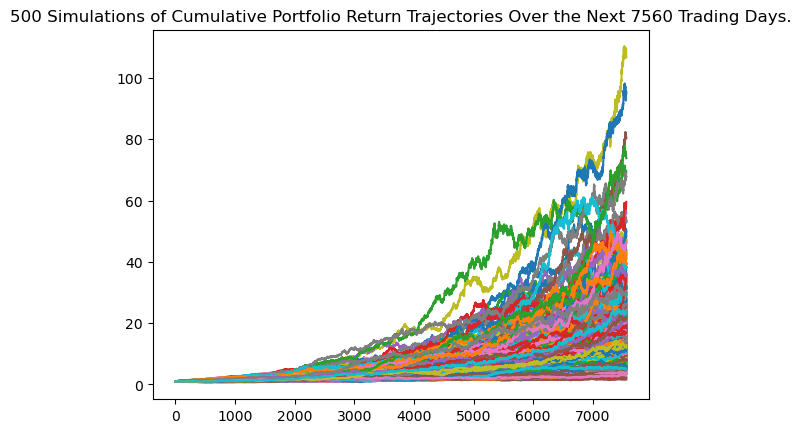

In [56]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

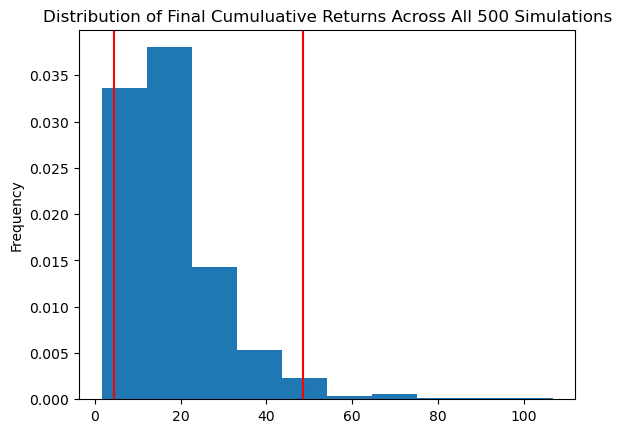

In [57]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

### Retirement Analysis

In [58]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()
# Print summary statistics
print(tbl)

count           500.000000
mean             17.997514
std              12.579127
min               1.584476
25%               9.676210
50%              15.099048
75%              22.537079
max             106.781130
95% CI Lower      4.509327
95% CI Upper     48.508582
Name: 7560, dtype: float64


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [60]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8] *initial_investment,2)
ci_upper = round(tbl[9] *initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $90186.54 and $970171.63


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [62]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8] * initial_investment,2)
ci_upper = round(tbl[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $135279.81 and $1455257.45


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [65]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252 * 5
)

In [66]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 110.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 120.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 130.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 300.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 350.
Running Monte Carlo simulation number 360.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 370.
Running Monte Carlo simulation number 380.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 390.
Running Monte Carlo simulation number 400.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 410.
Running Monte Carlo simulation number 420.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 430.
Running Monte Carlo simulation number 440.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 450.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 460.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 470.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 480.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 490.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003980,1.000750,0.999885,0.999321,1.003771,1.003043,1.002073,1.001885,0.998506,1.000477,...,0.997192,0.999203,0.995018,1.003100,0.995512,0.996276,0.999665,1.000680,1.001957,1.002887
2,1.005583,0.997697,0.992852,0.996971,1.004573,1.003663,0.998268,0.999775,1.000448,1.004491,...,0.996686,0.998595,0.991430,1.006380,0.998057,0.988691,1.000878,1.000881,1.001425,1.002338
3,1.002628,0.995231,0.992790,1.001035,1.007587,1.006878,0.998700,0.999061,1.000463,1.005448,...,0.997719,1.001536,0.990663,1.005476,1.001496,0.990783,1.006542,1.000456,1.002538,1.002171
4,1.004426,0.997509,0.993741,0.999924,1.002216,1.000936,0.996691,0.995897,1.004149,1.005697,...,1.002987,1.006093,0.994431,1.010528,1.007574,0.990700,1.004033,1.000366,0.996738,1.002779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.303488,1.141355,1.135128,1.156840,1.125999,1.219512,1.461541,1.082922,1.290187,1.370866,...,1.286605,1.193025,1.200656,1.569311,1.170094,1.129293,1.349415,1.287604,1.179346,1.130924
1257,1.304273,1.135973,1.133794,1.158127,1.125650,1.225542,1.463919,1.081262,1.284967,1.360285,...,1.284145,1.191624,1.206832,1.574198,1.172631,1.132681,1.355793,1.293807,1.180209,1.132282
1258,1.305590,1.132670,1.124897,1.153673,1.128438,1.227098,1.462136,1.078075,1.279527,1.360832,...,1.287743,1.187691,1.206045,1.576056,1.169104,1.133867,1.352031,1.296237,1.185650,1.138841
1259,1.297321,1.133994,1.117221,1.151376,1.129633,1.221007,1.469432,1.078816,1.285003,1.362908,...,1.283555,1.184312,1.207654,1.573027,1.164602,1.141510,1.358086,1.294797,1.179973,1.135623


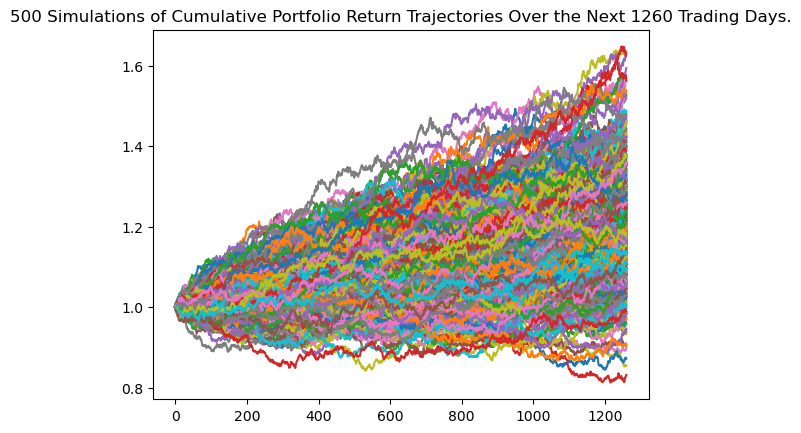

In [67]:
# Plot simulation outcomes
line_plot_five = MC_five_year.plot_simulation()

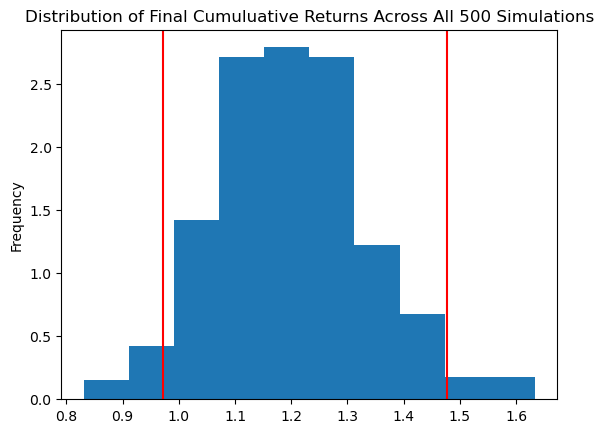

In [68]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_five_year.plot_distribution()

In [70]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five=MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.201411
std               0.132911
min               0.831271
25%               1.109823
50%               1.187519
75%               1.283297
max               1.633422
95% CI Lower      0.971588
95% CI Upper      1.478012
Name: 1260, dtype: float64


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [75]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five =round(tbl_five[8] * initial_investment, 2)
ci_upper_five =round(tbl_five[9] * initial_investment, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $58295.28 and $88680.69


### Ten Years Retirement Option

In [74]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252 * 10
)

In [76]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 110.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 120.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 130.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 140.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 150.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 160.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 170.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 180.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 190.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 200.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 210.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 220.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 230.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 240.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 250.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 260.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 270.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 280.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 290.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 300.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 310.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 320.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 330.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 340.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 350.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 360.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 370.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 380.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 390.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 400.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 410.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 420.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 430.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 440.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 450.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 460.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 470.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 480.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

Running Monte Carlo simulation number 490.


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Inst

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998585,0.999825,1.003112,0.998572,0.994765,0.998823,1.003235,1.002487,1.008541,1.004220,...,1.004042,1.000272,0.996194,0.997786,1.001814,1.001740,0.998387,0.997229,1.001131,1.003543
2,0.999403,0.993005,1.000684,0.997296,0.998601,1.000647,1.002729,1.001261,1.010380,1.003815,...,1.000855,1.001322,0.998911,1.002702,1.005020,1.006690,1.003977,0.998357,1.000174,1.004982
3,1.004105,0.991699,0.999260,0.993745,0.999867,1.002126,1.002633,0.996825,1.008381,1.006434,...,0.996862,1.000770,0.998052,1.004033,1.008098,0.998973,0.998796,0.999332,1.000632,1.004014
4,1.003233,0.992732,0.995761,0.989959,1.001302,1.003183,1.005255,0.992805,1.008702,1.011532,...,0.994691,1.003277,0.998876,1.003130,1.011017,0.999901,0.996049,0.997973,1.000012,1.006141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.606839,1.702418,1.209906,1.398620,1.269779,1.048724,1.759551,1.985838,1.339727,2.075119,...,1.256305,1.728939,1.157875,1.719349,1.562175,1.517600,1.501329,1.499325,1.263439,1.476231
2517,1.607934,1.704914,1.213751,1.399986,1.270323,1.049503,1.760260,1.988345,1.339179,2.083901,...,1.256967,1.732801,1.158535,1.719664,1.559390,1.516783,1.502891,1.499511,1.266775,1.478677
2518,1.611000,1.710119,1.213904,1.392893,1.267164,1.050912,1.758966,1.993806,1.336555,2.079711,...,1.260569,1.727139,1.153399,1.723262,1.564232,1.522459,1.503303,1.503077,1.270909,1.481297
2519,1.609855,1.713626,1.220621,1.383509,1.274211,1.050130,1.765207,1.998931,1.337132,2.083847,...,1.261483,1.728064,1.149538,1.720926,1.569743,1.519684,1.508529,1.506021,1.277600,1.485771


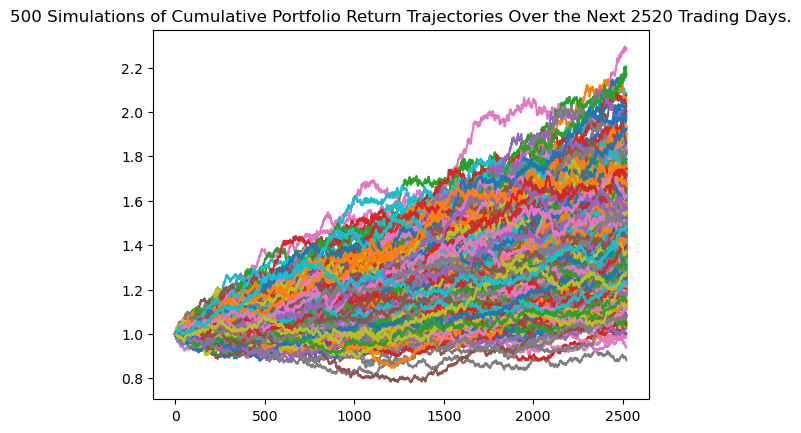

In [77]:
# Plot simulation outcomes
line_plot_five = MC_ten_year.plot_simulation()

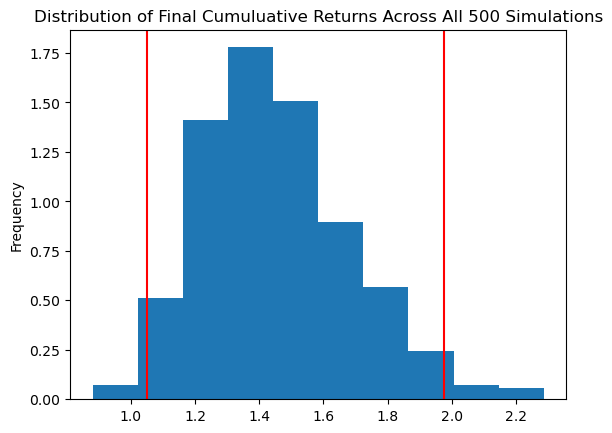

In [78]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_ten_year.plot_distribution()

In [79]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean              1.452626
std               0.232178
min               0.881406
25%               1.284963
50%               1.426610
75%               1.594099
max               2.286953
95% CI Lower      1.051509
95% CI Upper      1.976610
Name: 2520, dtype: float64


/Users/kdot/Desktop/RUT-VIRT-FIN-PT-12-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [80]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten =round(tbl_ten[8] * initial_investment, 2)
ci_upper_ten =round(tbl_ten[9] * initial_investment, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $63090.52 and $118596.62
